<a href="https://colab.research.google.com/github/lookee/seir-model/blob/master/SEIR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modeling How Infectious Diseases like Coronavirus Spread**

Luca Amore

![COVID-19](https://github.com/lookee/seir-model/blob/master/covid-19.jpg?raw=true)

Based on the article:

**Modeling How Infectious Diseases like Coronavirus Spread**

By Jennifer Ciarochi

https://triplebyte.com/blog/modeling-infectious-diseases

**Compartmental Modeling of Viruses**

The SEIR model can be schematically represented by:

![SEIR](https://github.com/lookee/seir-model/blob/master/SEIR_model.jpg?raw=true)


In [0]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
 

In [0]:
# virus model

force_of_infection = 5e-9 # 1 / day person
incubation_rate = 1. # days
recovery_rate = 5. # days
h = 1 # sample for day 

def virus(x,t):
  s = x[0]
  e = x[1]
  i = x[2]
  r = x[3]

  # basic virus model
  h = 1
  s2e = h * force_of_infection * s * i
  e2i = h / incubation_rate * e
  i2r = h / recovery_rate * i
  dsdt = - s2e
  dedt = + s2e - e2i
  didt = + e2i - i2r
  drdt = + i2r

  return (dsdt, dedt, didt, drdt)

In [0]:
# starting conditions
s0 = 1e8 - 1e6 - 1e5 # susceptible
e0 = 0 # exposed
i0 = 1e5 # infectious
r0 = 1e6 # recovered

days = 60

# solve differential equations
t = np.linspace(0,days,days)
x0 = [s0, e0, i0, r0]
x = odeint(virus,x0,t)

# extract series
s = x[:,0]
e = x[:,1]
i = x[:,2]
r = x[:,3]


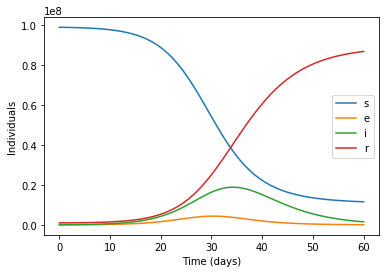

In [36]:
plt.plot(t,s, label='s')
plt.plot(t,e, label='e')
plt.plot(t,i, label='i')
plt.plot(t,r, label='r')
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

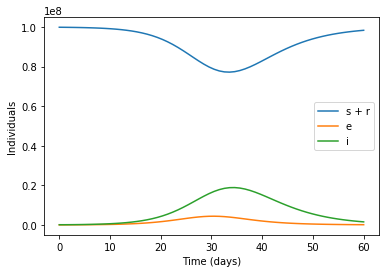

In [37]:
plt.plot(t,s + r, label='s + r')
plt.plot(t,e, label='e')
plt.plot(t,i, label='i')
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

**References**

[Simulate HIV Infection](https://apmonitor.com/pdc/index.php/Main/SimulateHIV)

[Simulate Coupled Differential Equations in Python](https://youtu.be/zRMmiBMjP9o)

[Differential Equation in Action](https://www.udacity.com/course/differential-equations-in-action--cs222)